In [203]:
# Project 2 CKD Prediction
# Christine Orosco 1/30/2023
'''
Predict the probabiity of a person being diagnosed with CKD

'''

'\nPredict the probabiity of a person being diagnosed with CKD\n\n'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Perform Data Cleaning

In [9]:
# Read in data set

In [72]:
# The UCI dataset 

df = pd.read_csv('ckd_dataset.csv', header=0)

In [73]:
df.head()

,age,bp,sg,al,su,rbc,pc,ba,bgr,bu,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,Unnamed: 24
0,48,80,1.020,1,0,?,normal,notpresent,121,36,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1.020,4,0,?,normal,notpresent,?,18,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1.010,2,3,normal,normal,notpresent,423,53,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1.005,4,0,normal,abnormal,notpresent,117,56,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1.010,2,0,normal,normal,notpresent,106,26,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


In [74]:
#Define column names with abreviations

labels = {
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wbcc': 'white_blood_cell_count',
    'rbcc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'class': 'class'}

In [75]:
#Clean the dataset

# Remove bogus column Unamed: 24
#df.drop(['Unnamed: 24'], axis=1, inplace=True)
df

,age,bp,sg,al,su,rbc,pc,ba,bgr,bu,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,Unnamed: 24
0,48,80,1.020,1,0,?,normal,notpresent,121,36,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1.020,4,0,?,normal,notpresent,?,18,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1.010,2,3,normal,normal,notpresent,423,53,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1.005,4,0,normal,abnormal,notpresent,117,56,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1.010,2,0,normal,normal,notpresent,106,26,...,7300,4.6,no,no,no,good,no,no,ckd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,140,49,...,6700,4.9,no,no,no,good,no,no,notckd,NaN
396,42,70,1.025,0,0,normal,normal,notpresent,75,31,...,7800,6.2,no,no,no,good,no,no,notckd,NaN
397,12,80,1.020,0,0,normal,normal,notpresent,100,26,...,6600,5.4,no,no,no,good,no,no,notckd,NaN
398,17,60,1.025,0,0,normal,normal,notpresent,114,50,...,7200,5.9,no,no,no,good,no,no,notckd,NaN


In [76]:
#Check the col defs
df.dtypes

age            object
bp             object
sg             object
al             object
su             object
rbc            object
pc             object
ba             object
bgr            object
bu             object
sc             object
sod            object
pot            object
hemo           object
pcv            object
wbcc           object
rbcc           object
htn            object
dm             object
cad            object
appet          object
pe             object
ane            object
class          object
Unnamed: 24    object
dtype: object

In [77]:
# Change unknown values with ?
# Take the average or use the lowest common values.
# First find any NAN values

df.isnull().sum()

age              0
bp               0
sg               0
al               0
su               0
rbc              0
pc               0
ba               0
bgr              0
bu               0
sc               0
sod              0
pot              0
hemo             0
pcv              0
wbcc             0
rbcc             0
htn              0
dm               1
cad              0
appet            0
pe               0
ane              0
class            0
Unnamed: 24    399
dtype: int64

In [78]:
# Look at the occurrence of the values
df['rbcc'].describe()

count     400
unique     50
top         ?
freq      130
Name: rbcc, dtype: object

In [79]:
df['su']

0      0
1      0
2      3
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: su, Length: 400, dtype: object

In [80]:
#Fill NaN value
df['dm'].fillna('normal',inplace=True)

In [81]:
# Replace the Question marks.
df['rbc'] = df['rbc'].replace({"?":"normal"})

In [82]:
# Replace bgr
df['bgr'] = df['bgr'].replace({"?":150})

In [83]:
# Replace rbcc
df['rbcc'] = df['rbcc'].replace({"?":5.0})

In [84]:
# Look for other columns with ? mark
clean_lst = []
names = df.columns
for i in names:
    for j in df[i]:
        if j == "	?":
            clean_lst.append(i)
            break


In [85]:
clean_lst   

['pcv', 'wbcc', 'rbcc']

In [86]:
# Replace pcv
df['pcv'] = df['pcv'].replace({"	?":49})

In [87]:
# Replace values
def re_value(col, new_val):
        df[col] = df[col].replace({"	?":new_val})
        return

In [88]:
col = 'rbcc'
new_val = 8.5
re_value(col, new_val)

In [89]:
# Look at the occurrence of the values
df.describe()


,age,bp,sg,al,su,rbc,pc,ba,bgr,bu,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,Unnamed: 24
count,400,400,400,400,400,400,400,400,400,400,...,400,400.0,400,400,400,400,400,400,400,1
unique,77,11,6,7,7,2,3,3,147,119,...,91,50.0,3,7,5,4,4,3,4,1
top,60,80,1.020,0,0,normal,normal,notpresent,150,?,...,?,5.0,no,no,no,good,no,no,ckd,notckd
freq,19,116,106,199,290,353,259,374,44,19,...,105,130.0,251,257,362,316,322,339,248,1


In [118]:
# Look for other columns with ? mark
clean_lst = []
names = df.columns
for i in names:
    for j in df[i]:
        if j == "?":
            clean_lst.append(i)
            break

In [122]:
# Look for other columns with ? mark
clean_lst2 = []
names = df.columns
for i in names:
    for j in df[i]:
        if j == "	?":
            clean_lst2.append(i)
            break

In [123]:
clean_lst2

['wbcc']

In [119]:
clean_lst

['bu']

In [92]:
# Replace values
def re_value(col, new_val):
        df[col] = df[col].replace({"?":new_val})
        return

In [93]:
#{age:55, bp:80,sg:1.010, al:1,su:0,pc:normal(0)abnormal=1,ba:0=present,1=notpresent
#sc:9.0,sod:135,pot:8.0,hemo:13.5,pcv:38,wbc:8000, htn:0=no,1=yes,dm:00=no,1=yes
#cad:00=no,1=yes,appet:poor=1good=0, pe00=no,1=yes, ane00=no,1=yes,rbc:normal(0)abnormal=1

new_data = {'age':55, 'bp':80,'sg':1.010, 'al':1,'su':0,
            'sc':9.0,'sod':135,'pot':8.0,'hemo':13.5,'pcv':38,'wbcc':8000}

for k,v in new_data.items():
    col = k
    new_val = v
    new_col = re_value(col, new_val)

In [94]:
df['bu'].head(15)

0      36
1      18
2      53
3      56
4      26
5      25
6      54
7      31
8      60
9     107
10     55
11     60
12     72
13     86
14     90
Name: bu, dtype: object

In [120]:
df['bu'] = df['bu'].replace({"?":90})

In [124]:
df['wbcc'] = df['wbcc'].replace({"	?":8000})

In [95]:
# Define cat cols 
cat_cols = ['htn', 'dm', 'cad', 'pe', 'ane', 'class', 'rbc', 'pc', 'appet', 'ba']
#cat_cols1 = ['htn', 'dm', 'cad', 'pe', 'ane']
#cat_cols2 = ['rbc', 'pc']
#cat_cols3 = ['appet']
#cat_cols4 = ['ba']

In [96]:
# Replace cat values with binary values

for i in cat_cols:
    df[i] = df[i].replace({"?":0})


In [97]:
#Replace other extraneous chars
df['pc'] = df['pc'].replace({"?":0})
df['class'] = df['class'].replace({"ckd":1, "notckd":0, "'ckd\t":1})
df['pe'] = df['pe'].replace({"good":0})
df['appet'] = df['appet'].replace({"no":0, "?":1})
df['ba'] = df['ba'].replace({"?":1})

df['dm'] = df['dm'].replace({" yes":1, "\tno":0,"\tyes":1,"normal":0})

In [98]:
df['dm'] = df['dm'].replace({"yes":1, "no":0,})

In [99]:
df['class'] = df['class'].replace({"ckd\t":1})

In [115]:
# Check for other values in categorical columns
for i in cat_cols:
    print(f'{i} {df[i].unique()}')

htn [1 0]
dm [1 0]
cad [0 1]
pe [0 1]
ane [0 1]
class [1 0]
rbc [0 1]
pc [0 1]
appet [0 1]
ba [0 1]


In [101]:
df['class'] = df['class'].replace({"no":0})

In [114]:
df['htn'] = df['htn'].replace({"no":0, "yes":1})

In [113]:
df['rbc'] = df['rbc'].replace({"normal":0, "abnormal":1})

In [103]:
df['cad'] = df['cad'].replace({"no":0, "yes":1, "No":0, "\tno":0})

In [104]:
df['ane'] = df['ane'].replace({"no":0, "yes":1})

In [105]:
df['pe'] = df['pe'].replace({"no":0, "yes":1})

In [106]:
df['htn'] = df['htn'].replace({"normal":0, "abnormal":1})

In [107]:
df['pc'] = df['pc'].replace({"normal":0, "abnormal":1})

In [108]:
df['appet'] = df['appet'].replace({"good":0, "poor":1})

In [109]:
df['ba'] = df['ba'].replace({"notpresent":0, "present":1})

In [116]:
df.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc       int64
pc        int64
ba        int64
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn       int64
dm        int64
cad       int64
appet     int64
pe        int64
ane       int64
class     int64
dtype: object

In [111]:
df.drop(columns=['Unnamed: 24'], axis=1, inplace=True) 

In [125]:
# Change df to numeric
df = df.apply(pd.to_numeric)

In [126]:
df.dtypes

age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc        int64
pc         int64
ba         int64
bgr        int64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [127]:
# Keep a copy just incase need to revert back to this
df_copy = df
df_copy.to_csv('new_ckd_data2.csv')

In [128]:
#Read in the new dataset
df = pd.read_csv('new_ckd_data2.csv', header=0)

In [129]:
df.drop("Unnamed: 0", axis=1, inplace=True)


In [40]:
# Check values in certain columns


# Perform Data Correlations and Relationship Analysis

In [130]:
# Compute correlation between features
corr_df = df.corr()
corr_df

,age,bp,sg,al,su,rbc,pc,ba,bgr,bu,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.136121,-0.212145,0.111207,0.185521,0.016852,0.108413,0.043633,0.212837,0.170725,...,-0.204758,0.092800,-0.190103,0.386340,0.355239,0.232499,0.150940,0.093422,0.048092,0.222755
bp,0.136121,1.000000,-0.211619,0.147564,0.189561,0.150384,0.156231,0.110164,0.149744,0.182174,...,-0.295150,0.022177,-0.215067,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,0.293693
sg,-0.212145,-0.211619,1.000000,-0.427115,-0.222632,-0.161723,-0.251734,-0.165956,-0.311199,-0.320948,...,0.546819,-0.141381,0.393612,-0.438216,-0.458341,-0.186755,-0.259634,-0.289736,-0.265119,-0.720910
al,0.111207,0.147564,-0.427115,1.000000,0.262564,0.374484,0.535895,0.368222,0.327390,0.396791,...,-0.525709,0.191492,-0.411869,0.480675,0.377038,0.236254,0.330264,0.440612,0.281546,0.598389
su,0.185521,0.189561,-0.222632,0.262564,1.000000,0.092940,0.190062,0.119399,0.629700,0.122439,...,-0.182275,0.156649,-0.156812,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,0.294555
rbc,0.016852,0.150384,-0.161723,0.374484,0.092940,1.000000,0.377394,0.184402,0.154056,0.237919,...,-0.271486,-0.003471,-0.181685,0.140538,0.145646,0.111493,0.160868,0.199285,0.107625,0.282642
pc,0.108413,0.156231,-0.251734,0.535895,0.190062,0.377394,1.000000,0.330401,0.263195,0.338142,...,-0.418691,0.106733,-0.372117,0.291719,0.201032,0.172295,0.274985,0.350227,0.260566,0.375154
ba,0.043633,0.110164,-0.165956,0.368222,0.119399,0.184402,0.330401,1.000000,0.086393,0.149388,...,-0.190211,0.104748,-0.188575,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,0.186871
bgr,0.212837,0.149744,-0.311199,0.327390,0.629700,0.154056,0.263195,0.086393,1.000000,0.131373,...,-0.269870,0.114906,-0.195127,0.369813,0.500175,0.212723,0.175960,0.101941,0.127844,0.402785
bu,0.170725,0.182174,-0.320948,0.396791,0.122439,0.237919,0.338142,0.149388,0.131373,1.000000,...,-0.519610,0.034946,-0.439877,0.367661,0.300813,0.217758,0.266698,0.332424,0.427274,0.372208


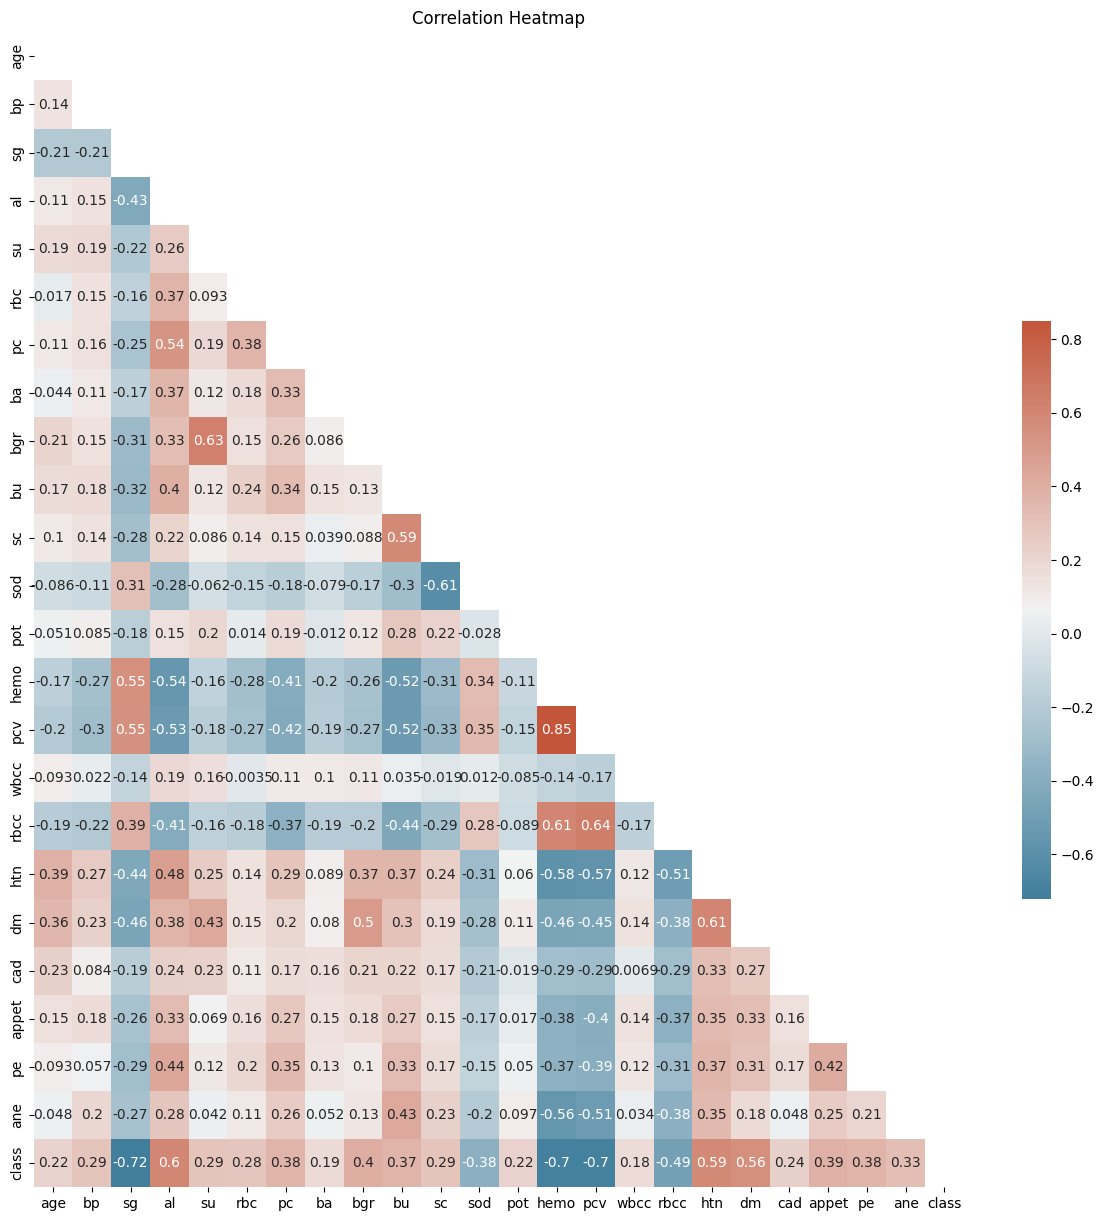

In [131]:
# Define seaborn parameters

#Generate a cubehelix heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Create a mask to display the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Set up the figure bounds

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_df, mask=mask, cmap=cmap,   cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap')
plt.savefig("sns-heatmap.png")
plt.show()

In [43]:
# There doesn't seem to be many positive correlation between features
# Person with anemia is expected to have a lower hemoglobin and low red blood cell counts
# Check the analysis

In [44]:
#Look at some variables with seaborn pairplots

<Figure size 1400x1000 with 0 Axes>

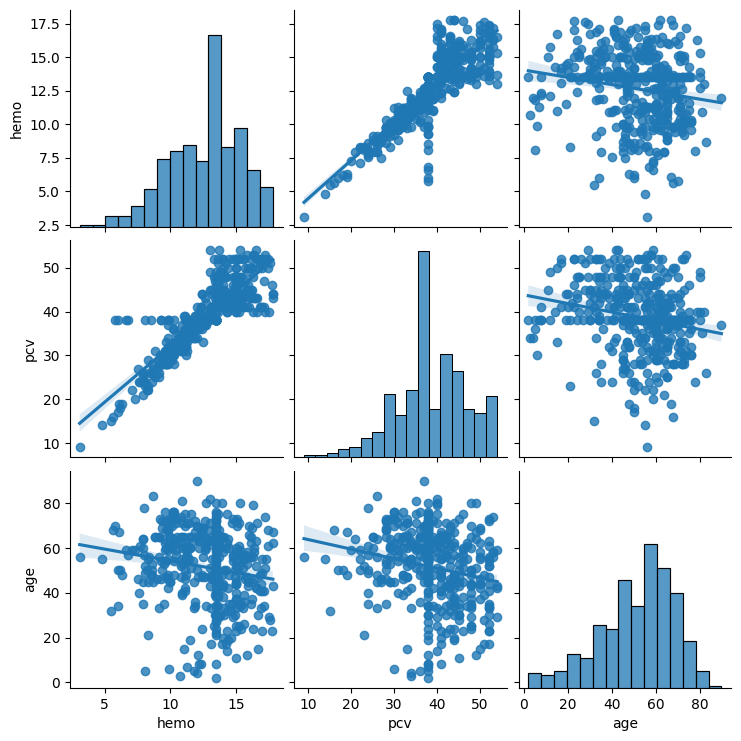

In [134]:
plt.figure(figsize=(14,10))

sns.pairplot(df[['hemo','pcv','age']], kind="reg")
plt.show()

<Figure size 1000x1000 with 0 Axes>

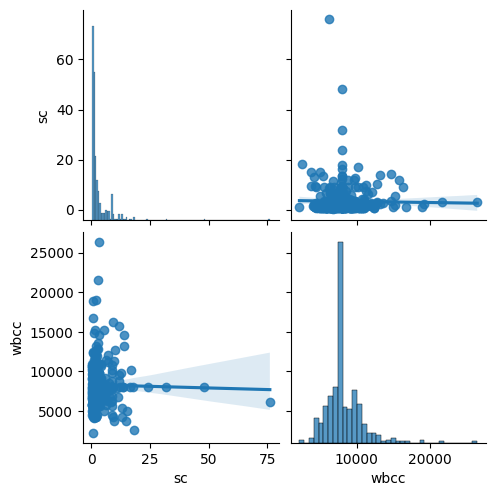

In [135]:
# Look at serum creatinine and potassium and sodium levels
# There appears to be a linear relationship between sc and hemoglobin 

plt.figure(figsize=(10,10))

sns.pairplot(df[['sc', 'wbcc']], kind="reg")
plt.show()

<Figure size 1400x1000 with 0 Axes>

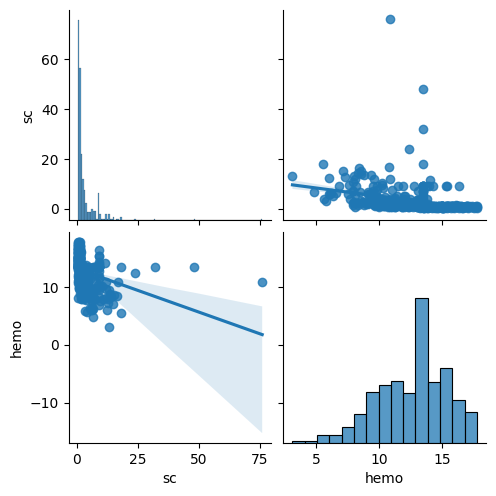

In [136]:
# Look at serum creatinine and hemoglobin
# There appears to be a linear relationship between sc and hemoglobin 

plt.figure(figsize=(14,10))
sns.pairplot(df[['sc', 'hemo']], kind="reg")
plt.show()

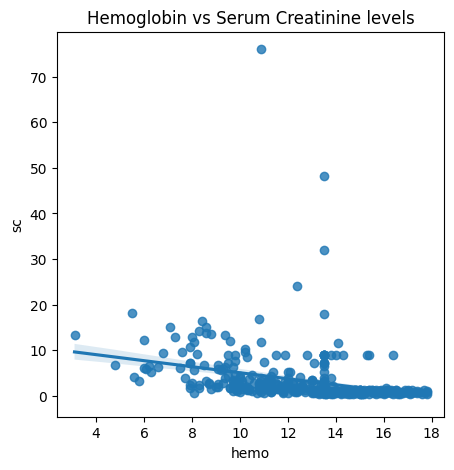

In [137]:
# look at a specific pair
plt.figure(figsize=(5,5))
xlabel = "Hemogloben Levels"
ylabel = "Serum Creatinine Levels"
sns.regplot(x=df["hemo"], y=df["sc"])
plt.title('Hemoglobin vs Serum Creatinine levels')
plt.show()


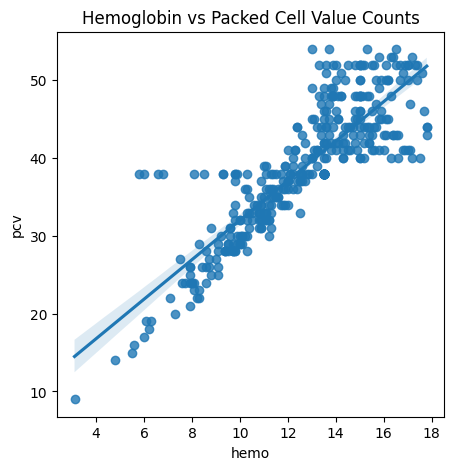

In [138]:
# look at a specific pair
# This is expected as hemoglobin counts rise so do the number of red blood cells
# This is a natural occurence and in itself does not show propensity towards CKD
# Pvc can be deleted from the feature set for the model.

plt.figure(figsize=(5,5))
xlabel = "Hemogloben Levels"
ylabel = "Packed Cell Value Counts"
sns.regplot(x=df["hemo"], y=df["pcv"])
plt.title('Hemoglobin vs Packed Cell Value Counts')
plt.show()

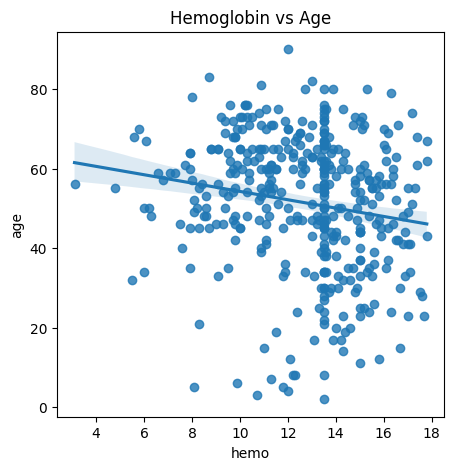

In [139]:
#Does age factor into the equation?

plt.figure(figsize=(5,5))
xlabel = "Hemoglobin Levels"
ylabel = "Age"
sns.regplot(x=df["hemo"], y=df["age"])
plt.title('Hemoglobin vs Age')
plt.show()

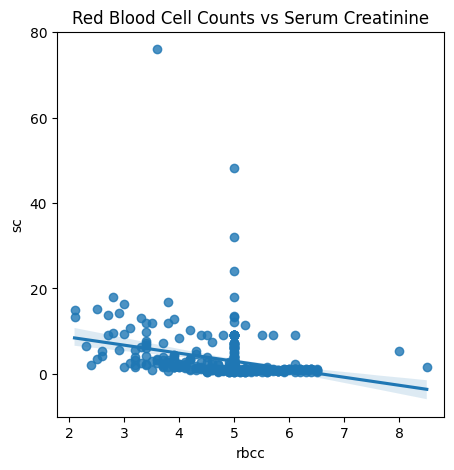

In [140]:
# Appears to have a linear relationship
# As rbcc counts increase, serum creatinine decrease
# makes sense because higher creatinine levels are associated with
# lower hemoglobin counts which indicates anemia
plt.figure(figsize=(5,5))
xlabel = "Red Blood Cell Counts"
ylabel = "Serum Creatinine"
sns.regplot(x=df["rbcc"], y=df["sc"])
plt.title('Red Blood Cell Counts vs Serum Creatinine')
plt.show()

In [52]:
# Analysis the data using Scatterplots to compare features 

In [142]:
#Create a scatter plot function using seaborn
def sns_scat_plt(X,Y,H, xlab, ylab, Title):
    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(x=df[X],y=df[Y],hue=df[H])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(Title)
    plt.legend()
    return (ax)

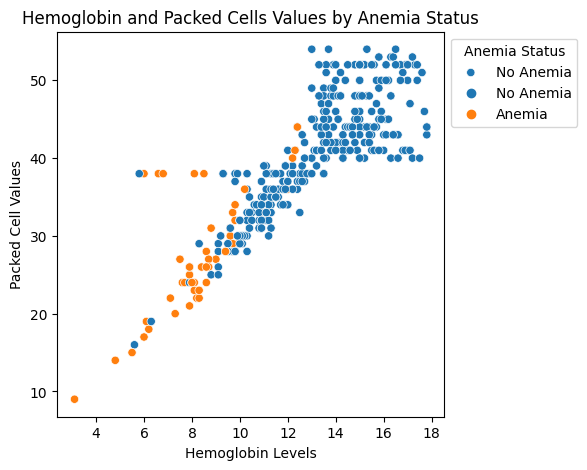

In [145]:
#Relationship between hemoglobin counts and Packed Cell Volumes by Anemia Status
# Expect the lower the hemoglobin and packed cell values to indicate anemia
X='hemo'
Y='pcv'
H='ane'
xlab='Hemoglobin Levels'
ylab='Packed Cell Values'
Title = 'Hemoglobin and Packed Cells Values by Anemia Status'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='Anemia Status', bbox_to_anchor=(1, 1),labels=['No Anemia', 'No Anemia', 'Anemia'] )
plt.show()

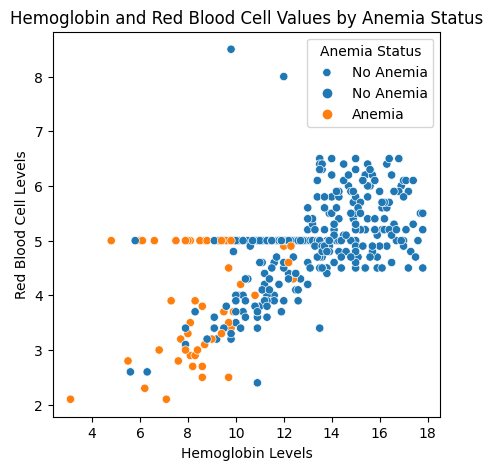

In [146]:
#Relationship between hemoglobin counts and Red Blood cell  Volumes by Anemia Status
# Expect the lower the hemoglobin and Red Blood cell values to indicate anemia

X='hemo'
Y='rbcc'
H='ane'
xlab='Hemoglobin Levels'
ylab='Red Blood Cell Levels'
Title = 'Hemoglobin and Red Blood Cell Values by Anemia Status'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='Anemia Status', bbox_to_anchor=(1, 1), labels=['No Anemia', 'No Anemia','Anemia'])
plt.show()

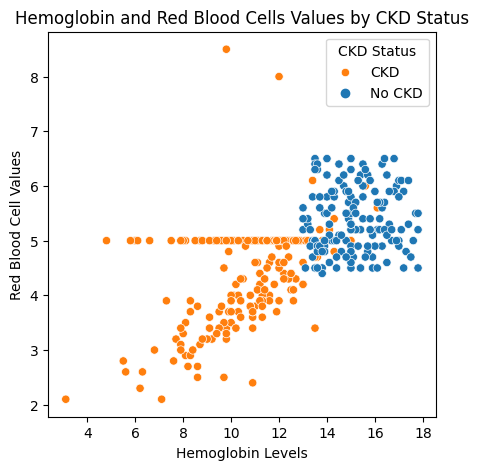

In [147]:
# Relationship between hemoglobin counts and Red Blood Cell Values by CKD Status
# With CKD comes anemia, expect lower hemoglobin and red blood cell values.
X='hemo'
Y='rbcc'
H='class'
xlab='Hemoglobin Levels'
ylab='Red Blood Cell Values'
Title = 'Hemoglobin and Red Blood Cells Values by CKD Status'

ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='CKD Status', bbox_to_anchor=(1, 1), labels=['CKD', 'No CKD'])
plt.show()

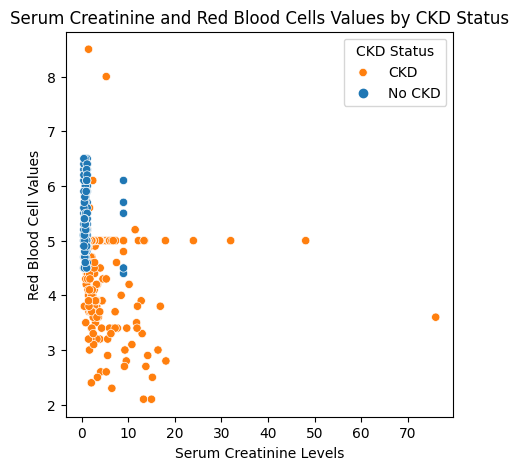

In [281]:
# Relationship between Serum Creatinine and Red Blood Cell Values by CKD Status
# With CKD comes anemia, expect lower hemoglobin and red blood cell values.
X='sc'
Y='rbcc'
H='class'
xlab='Serum Creatinine Levels'
ylab='Red Blood Cell Values'
Title = 'Serum Creatinine and Red Blood Cells Values by CKD Status'

ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='CKD Status', bbox_to_anchor=(1, 1), labels=['CKD', 'No CKD'])
plt.show()

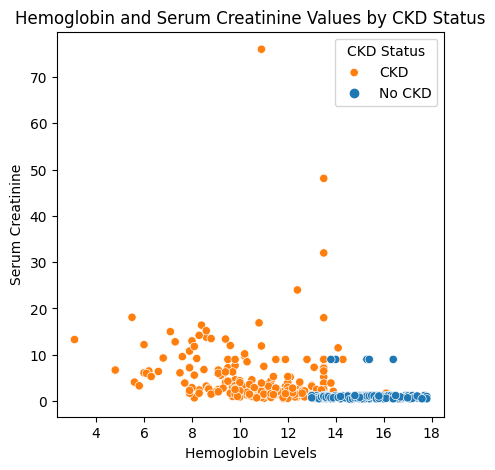

In [148]:
# Relationship between Serum Creatinine and Red Blood Cell Values by CKD Status
# With CKD comes anemia, expect lower hemoglobin and red blood cell values.
X='hemo'
Y='sc'
H='class'
xlab='Hemoglobin Levels'
ylab='Serum Creatinine'
Title = 'Hemoglobin and Serum Creatinine Values by CKD Status'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='CKD Status', bbox_to_anchor=(1, 1), labels=['CKD', 'No CKD'])
plt.show()


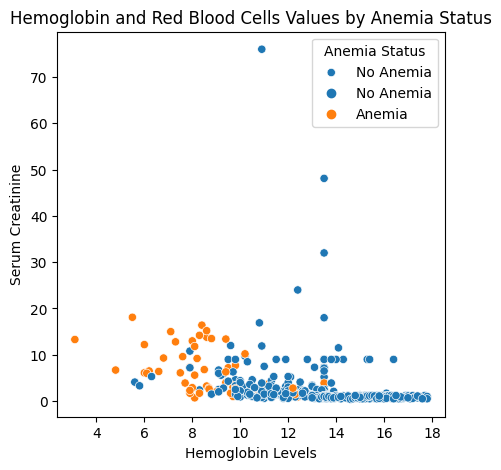

In [149]:
# Relationship between Serum Creatinine and Red Blood Cell Values by CKD Status
# With CKD comes anemia, expect lower hemoglobin and red blood cell values.
X='hemo'
Y='sc'
H='ane'
xlab='Hemoglobin Levels'
ylab='Serum Creatinine'
Title = 'Hemoglobin and Red Blood Cells Values by Anemia Status'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='Anemia Status', bbox_to_anchor=(1, 1), labels=['No Anemia', 'No Anemia','Anemia'])
plt.show()

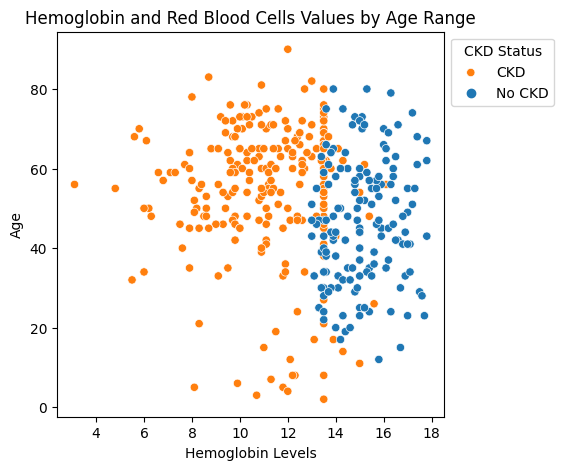

In [150]:
# Check the relationships by age
# Relationship between age and anemia (low hemoglobin values and low rbcc)


X='hemo'
Y='age'
H='class'
xlab='Hemoglobin Levels'
ylab='Age'
Title = 'Hemoglobin and Red Blood Cells Values by Age Range'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='CKD Status', bbox_to_anchor=(1, 1), labels=['CKD', 'No CKD'])
plt.show()

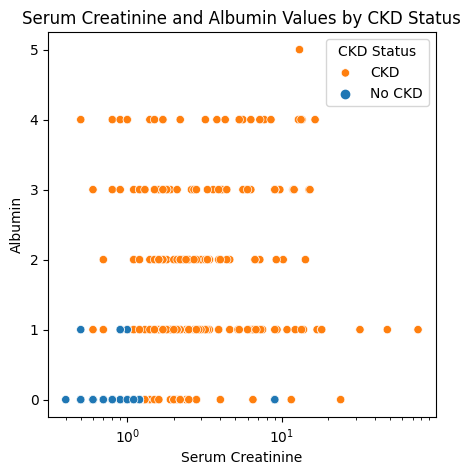

In [158]:
# Check the relationships by albumin
# Relationship between albumin and serum creatinine 


X='sc'
Y='al'
H='class'
xlab='Serum Creatinine'
ylab='Albumin'
Title = 'Serum Creatinine and Albumin Values by CKD Status'
ax = sns_scat_plt(X,Y,H, xlab, ylab, Title)
ax.legend(title='CKD Status', bbox_to_anchor=(1, 1), labels=['CKD', 'No CKD'])
ax.set_xscale("log")
plt.show()

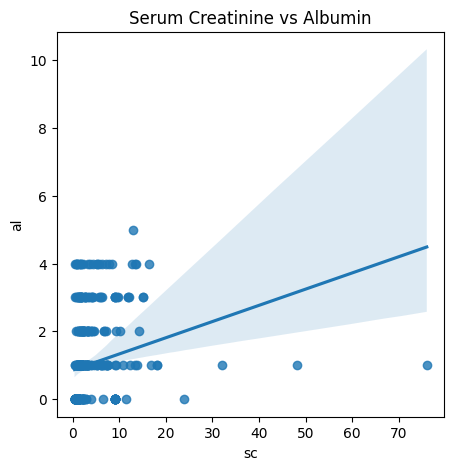

In [161]:
plt.figure(figsize=(5,5))
xlabel = "Serum Creatinine"
ylabel = "Albumin"
sns.regplot(x=df["sc"], y=df["al"])
plt.title('Serum Creatinine vs Albumin')
plt.show()

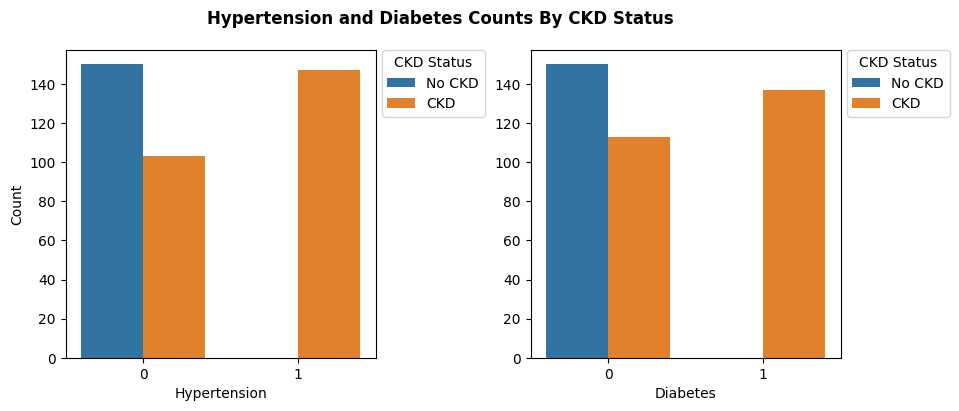

In [162]:

fig = plt.figure(figsize=(10,4))
title = fig.suptitle('Hypertension and Diabetes Counts By CKD Status', fontsize=12, fontweight="bold")
                         
fig.subplots_adjust(top=0.88, wspace=0.5)
    
# Countplot 1
ax1 = ax1 = fig.add_subplot(1,2,1)

    
ax1 = sns.countplot(x='htn',hue='class',data=df)
ax1.set_xlabel('Hypertension')
ax1.set_ylabel("Count")
plt.legend(title='CKD Status', labels=['No CKD', 'CKD'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)        
                                
# Countplot 2
ax2 = ax2 = fig.add_subplot(1,2,2)


ax2 = sns.countplot(x='dm',hue='class',data=df)
ax2.set_xlabel('Diabetes')
ax2.set_ylabel("")
plt.legend(title='CKD Status', labels=['No CKD', 'CKD'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)                             
plt.show()

# Feature Selection

In [167]:
#Create features and target sets
# Dependent variable is the CKD status or 'class'
# y is the class column, last column in the dataset

In [168]:

X = df.iloc[: , :-1]  #features
y = df.iloc[:,-1:]    #target


In [169]:
# Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(y)


In [170]:
# Create the training and test datasets
# Train Test Split
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size = 0.2, random_state = 0)

In [172]:
# Only 400 obs in df, check the shape of X_train and X_test
X_train.shape, X_test.shape

((320, 23), (80, 23))

In [173]:
#Conduct Feature Engineering

In [174]:
#Use RFE from SKlearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [175]:
# Build model
rf = RandomForestRegressor()
RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0)

#Fit the model
rf.fit(X_train,y_train.ravel())

#Check the score using R-squared
rf.score(X_test, y_test.ravel())



0.9285989010989011

In [176]:
# View the computed coefficients by viewing the .feature_importances object
# 
rf_df = pd.DataFrame(
    zip(X.columns, abs(rf.feature_importances_)),
    columns=["feature", "weight"],
    ).sort_values("weight").reset_index(drop=True)

rf_df

,feature,weight
0,ane,0.000000
1,cad,0.000000
2,ba,0.000000
3,pc,0.000118
4,su,0.000519
5,wbcc,0.001393
6,rbc,0.001446
7,age,0.001632
8,pe,0.002120
9,bp,0.002197


In [177]:
# Feature Selection using RFECV


In [178]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [179]:
#Build model and fit the model

In [180]:
min_features_to_select = 3

clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train.ravel())

print(f"Optimal number of features: {rfecv.n_features_}")


Optimal number of features: 13


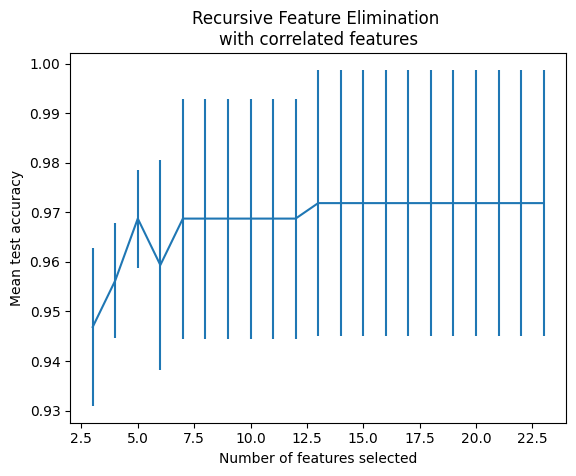

In [181]:
#Plot the features vs cross-validation scores

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [182]:
# View the selected features along with the weights from the RFE model
# 
rfecv_df = pd.DataFrame(
    zip(X.columns, rfecv.support_, rf_df['weight']),
    columns=["feature", "mask", 'rf weights'],
    ).sort_values("rf weights").reset_index(drop=True)

rfecv_df

,feature,mask,rf weights
0,age,False,0.000000
1,bp,True,0.000000
2,sg,True,0.000000
3,al,True,0.000118
4,su,False,0.000519
5,rbc,True,0.001393
6,pc,True,0.001446
7,ba,False,0.001632
8,bgr,True,0.002120
9,bu,False,0.002197


In [183]:
# Create the feature dataset from the feature estimator model
# to input to the prediction models

In [184]:
#Copy the old df with all the columns from both models
col = rfecv_df['feature'].to_list()


In [185]:
new_df = df[col]

In [186]:
#add the class column
new_df['class'] = df['class']


In [187]:
# select only the feature columns selected by RFECV
rfecv_cols = rfecv_df[rfecv_df['mask'] == True]

In [188]:
rfecv_cols

,feature,mask,rf weights
1,bp,True,0.000000
2,sg,True,0.000000
3,al,True,0.000118
5,rbc,True,0.001393
6,pc,True,0.001446
8,bgr,True,0.002120
13,hemo,True,0.014456
14,pcv,True,0.014624
16,rbcc,True,0.015105
17,htn,True,0.016455


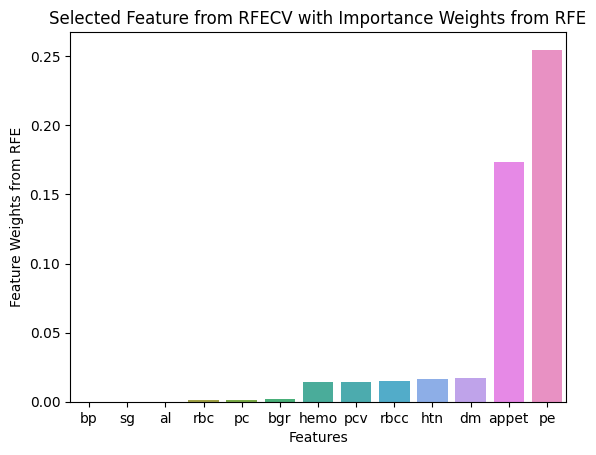

In [189]:
#Plot the selected features by weight
#Use a barplot

sns.barplot(x=rfecv_cols['feature'], y = rfecv_cols['rf weights'])
plt.title('Selected Feature from RFECV with Importance Weights from RFE')
plt.xlabel('Features')
plt.ylabel('Feature Weights from RFE')
plt.show()                                                    

In [190]:
#add class to the list of best features
best_feature_lst = rfecv_cols['feature'].to_list()
best_feature_lst.append('class')

In [191]:
feature_df = new_df[best_feature_lst]

In [192]:
# df for prediction models
feature_df

,bp,sg,al,rbc,pc,bgr,hemo,pcv,rbcc,htn,dm,appet,pe,class
0,80,1.020,1,0,0,121,15.4,44,5.2,1,1,0,0,1
1,50,1.020,4,0,0,150,11.3,38,5.0,0,0,0,0,1
2,80,1.010,2,0,0,423,9.6,31,5.0,0,1,1,0,1
3,70,1.005,4,0,1,117,11.2,32,3.9,1,0,1,1,1
4,80,1.010,2,0,0,106,11.6,35,4.6,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,0,0,0,140,15.7,47,4.9,0,0,0,0,0
396,70,1.025,0,0,0,75,16.5,54,6.2,0,0,0,0,0
397,80,1.020,0,0,0,100,15.8,49,5.4,0,0,0,0,0
398,60,1.025,0,0,0,114,14.2,51,5.9,0,0,0,0,0


In [ ]:
#Add the serum-column column for an additional test

In [296]:
new_test_data = new_df[best_feature_lst].copy()

In [297]:
new_test_data['sc'] = new_df['sc'].copy()

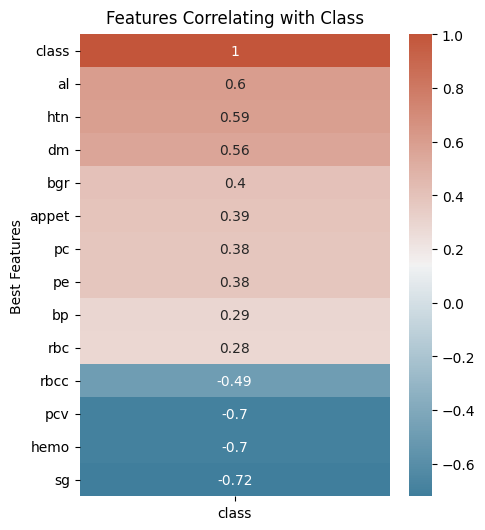

In [193]:
# Plot the correlation with CKD Status aka Class variable
# Compute the correlation matrix
corr = feature_df.corr()

plt.figure(figsize=(5, 6))

ax = sns.heatmap(feature_df.corr()[['class']].sort_values(by='class', ascending=False), annot=True, cmap=cmap)
ax.set_title('Features Correlating with Class', fontdict={'fontsize':12}, pad=8)
plt.yticks(rotation=0)
plt.ylabel('Best Features')
plt.show()

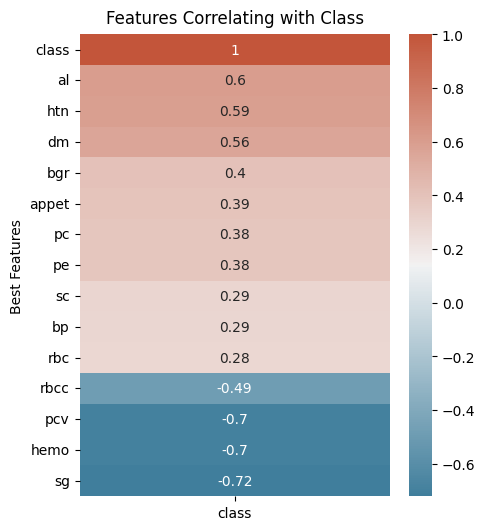

In [300]:
# Plot the correlation with CKD Status using the new_test_set with the sc values
# Compute the correlation matrix
corr = new_test_data.corr()

plt.figure(figsize=(5, 6))

ax = sns.heatmap(new_test_data.corr()[['class']].sort_values(by='class', ascending=False), annot=True, cmap=cmap)
ax.set_title('Features Correlating with Class', fontdict={'fontsize':12}, pad=8)
plt.yticks(rotation=0)
plt.ylabel('Best Features')
plt.show()

# Prepare the Training, Test, and Validation Sets

In [194]:
# Read in dataset as validation set
val_df = pd.read_csv('val_set.csv', usecols= best_feature_lst, header=0)

In [195]:
val_df.head()

,bp,sg,al,rbc,pc,bgr,hemo,pcv,rbcc,htn,dm,appet,pe,class
0,80.0,1.025,0.0,0.0,0.0,85.0,15.6,44,6.3,0.0,0.0,1.0,0.0,0.0
1,70.0,1.015,3.0,0.0,0.0,253.0,10.9,31,3.4,1.0,1.0,0.0,1.0,1.0
2,80.0,1.025,0.0,0.0,0.0,119.0,13.9,49,5.0,0.0,0.0,1.0,0.0,0.0
3,80.0,1.020,0.0,0.0,0.0,99.0,13.6,44,6.4,0.0,0.0,1.0,0.0,0.0
4,80.0,1.025,0.0,0.0,0.0,118.0,14.8,45,4.7,0.0,0.0,1.0,0.0,0.0


In [196]:
# sample the validation set
val_set = val_df.sample(n = 60)

In [303]:
X2 = feature_df.iloc[: , :-1]  #features
y2 = feature_df.iloc[:,-1:]    #target
val_set_test = val_set.iloc[:,:-1] #validation set
val_set_class = val_set.iloc[:,-1:] #validation class column 

In [198]:
#View the value counts for the test set
y2.value_counts()

class
1        250
0        150
dtype: int64

In [304]:
# Normalize the datasets

scaler = MinMaxScaler()
X_scale2 = scaler.fit_transform(X2)
y_scale2 = scaler.fit_transform(y2)
val_scale_test = scaler.fit_transform(val_set_test)
val_scale_class = scaler.fit_transform(val_set_class)

In [200]:
#Create training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale2, y_scale2, test_size = 0.2, random_state = 0)

In [201]:
#View the obs per set

y_test2.ravel()

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.])

# Build the model the models

## Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
# Use the Random Forest Classifier Model

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

#Train model 
rf_model = randomforest.fit(X_train2, y_train2.ravel())

In [204]:
# view model accuracy score
rf_model.score(X_test2, y_test2.ravel())


0.9625

In [205]:
# Random Forest appears to have a reasonable accuracy
#

In [206]:
# Compute predictions

from sklearn.metrics import RocCurveDisplay, roc_auc_score, average_precision_score, PrecisionRecallDisplay, ConfusionMatrixDisplay,\
                    precision_recall_curve, accuracy_score

In [207]:
# compute predict probabilties on test set
# only need the probabilities for the positive class only 

y_pred_probs = rf_model.predict_proba(X_test2)[:, 1]

# compute predictions on test set
y_preds = rf_model.predict(X_test2)

In [208]:
#Check the accuracy 
print(f'Accuracy:, {accuracy_score(y_test2.ravel(), y_preds)}')

Accuracy:, 0.9625


In [209]:
# Compute AUC to validate accuracy
auc_score = roc_auc_score(y_test2.ravel(), y_pred_probs)
round(auc_score,4)

0.999

In [ ]:
rf_model_new.score(X_test2_new, y_test2_new.ravel())

In [210]:
# Plot the ROC Curve

def roc_curve_plt(test, preds, Name,Title):
    lw = 1
    RocCurveDisplay.from_predictions(test, preds,
                                name = Name, 
                                color="red", pos_label=None)
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.title(Title)
    plt.show()
    return

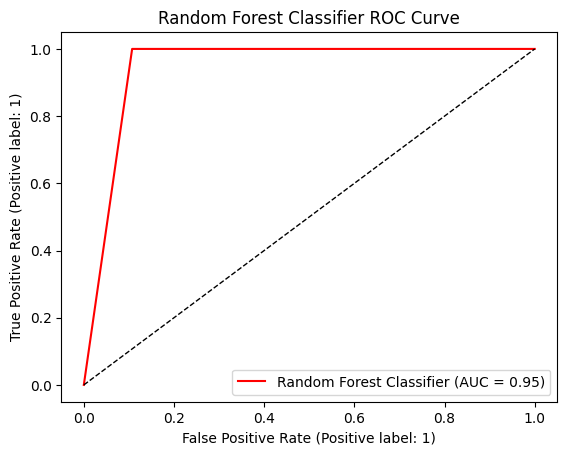

In [211]:
#Define parameters for ROC Curve plot
test = y_test2
preds = y_preds
Name = 'Random Forest Classifier'
Title = 'Random Forest Classifier ROC Curve'
roc_curve_plt(test, preds, Name,Title)

In [212]:
# Compute average precision score
# Plot the precision recall curve

def prc_plt(test, pred_probs, Name, Title):
    PrecisionRecallDisplay.from_predictions(
         test, pred_probs, name = Name)
    plt.title(Title)
    plt.show()
    return

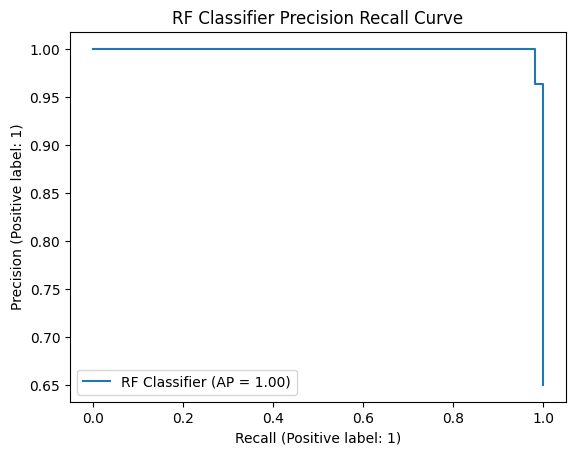

In [213]:
#Define parameters for prc
test = y_test2
pred_probs = y_pred_probs
Name = "RF Classifier"
Title = "RF Classifier Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

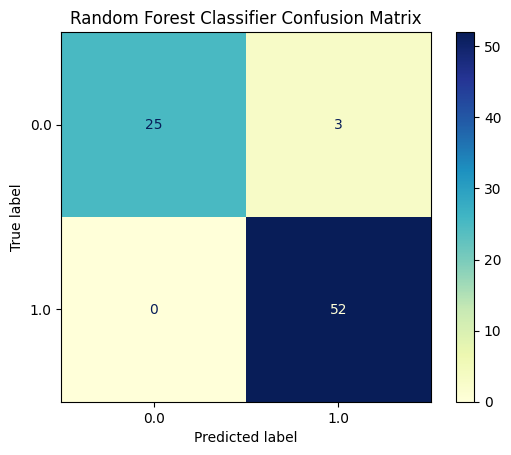

In [216]:
# Create Confusion Matrix from predictions
# Plot predictions on the test set
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test2, y_preds, cmap= 'YlGnBu')

plt.title("Random Forest Classifier Confusion Matrix")
plt.show()


In [217]:
# Build Classification report
print(classification_report(y_test2, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        28
         1.0       0.95      1.00      0.97        52

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



## Build Adaboost model

In [218]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [219]:
# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model on the important features data set
ab_model = adaboost.fit(X_train2, y_train2.ravel())

In [220]:
# Cross-validate Adaboost model

cvScore = cross_val_score(ab_model, X_test2, y_test2.ravel(), scoring="accuracy")
print("CV Scores:", cvScore)
print("CV Scores Mean:", cvScore.mean())

CV Scores: [0.875  0.875  1.     0.9375 1.    ]
CV Scores Mean: 0.9375


In [224]:
# Tune hyperparameters with Adaboost
from sklearn.model_selection import GridSearchCV

# Define hyperparameter candidates
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000], 
              'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}

# Instatiate GridSearchCV model
gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid)

# Train model
gs_ab_model = gs_ab.fit(X_train2, y_train2.ravel())

# Cross-validate model
cvScore2 = cross_val_score(gs_ab_model, X_test2, y_test2.ravel(), scoring="accuracy")
print("CV Scores:", cvScore2)
print("CV Scores Mean:", cvScore2.mean())

CV Scores: [0.9375 0.875  0.9375 0.9375 0.9375]
CV Scores Mean: 0.925


In [222]:
# View best hyperparameters
gs_ab_model.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [225]:
# Compute predictions 

# compute predict probabilties on test set
# only need the probabilities for the positive class only 
y_pred_probs_ab = gs_ab_model.predict_proba(X_test2)[:, 1]

# compute predictions on test set
y_preds_ab = gs_ab_model.predict(X_test2)

In [226]:
# Compute AUC
auc_score = roc_auc_score(y_test2, y_pred_probs_ab)
round(auc_score,4)

0.9979

In [227]:
#Check the accuracy 
print(f'Accuracy:, {accuracy_score(y_test2, y_preds_ab)}')

Accuracy:, 0.9625


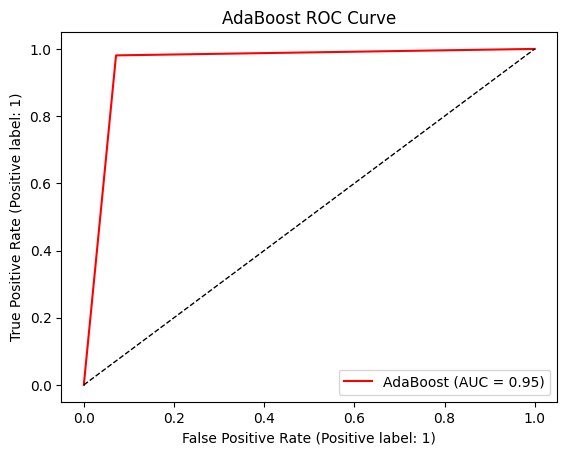

In [228]:
#Define parameters for ROC Curve plot
test = y_test2
preds = y_preds_ab
Name = 'AdaBoost'
Title = 'AdaBoost ROC Curve'
roc_curve_plt(test, preds, Name,Title)

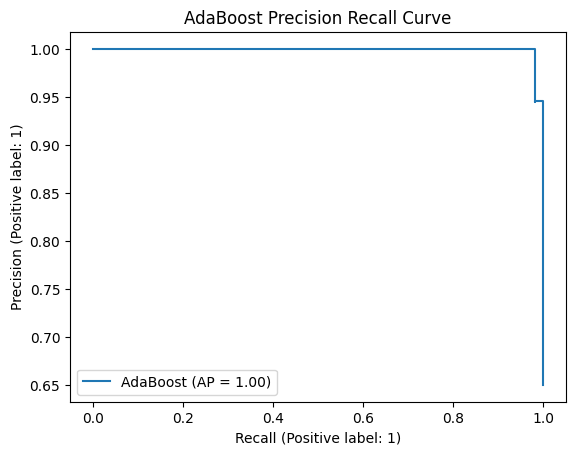

In [229]:
#Define parameters for prc
test = y_test2
pred_probs = y_pred_probs_ab
Name = "AdaBoost"
Title = "AdaBoost Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

In [230]:
# Build Classification report
print(classification_report(y_test2, y_preds_ab))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        28
         1.0       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



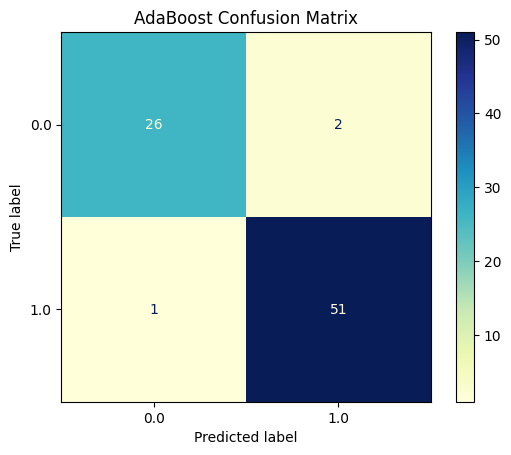

In [231]:
# Create Confusion Matrix from predictions

ConfusionMatrixDisplay.from_predictions(y_test2, y_preds_ab, cmap= 'YlGnBu')

plt.title("AdaBoost Confusion Matrix")
plt.show()

## XgBoost Model

In [250]:
# xgboost model

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [251]:
#Define model parameters for input to the GridSearch

params={'eta':[0.05,0.10,0.15,0.25],
        'max_depth':[3,4,5,6],
        'min_child_weight': [1,3,5],
        'gamma':[0.0,0.1,0.2,0.4],
        'colsample_bytree':[0.3,0.4,0.7]}

In [252]:
#Build and fit the model with cross-validation.

xg = xgb.XGBClassifier()

grid = GridSearchCV(xg, params, n_jobs=4,
                    scoring="accuracy",
                    cv=3)

grid.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.25],
                         'gamma': [0.0, 0.1, 0.2, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5]},
             scoring='accuracy')

In [253]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric=None,
              feature_types=None, gamma=0.4, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [254]:
grid.best_params_

{'colsample_bytree': 0.3,
 'eta': 0.25,
 'gamma': 0.4,
 'max_depth': 6,
 'min_child_weight': 1}

In [255]:
best_params = {'eta':[0.25],
        'max_depth':[6],
        'min_child_weight': [1,3,5],
        'gamma':[0.4],
        'colsample_bytree':[0.3,]}

In [256]:
grid.n_features_in_

13

In [257]:
#rerun the model with the best parameters
xg = xgb.XGBClassifier()

grid = GridSearchCV(xg, best_params, n_jobs=4,
                    scoring="accuracy",
                    cv=3)

grid.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3], 'eta': [0.25],
                         'gamma': [0.4], 'max_depth': [6],
                         'min_child_weight': [1, 3, 5]},
             scoring='accuracy')

In [258]:
# Score the training set
grid.best_score_

0.9749309351672251

In [259]:
#Score the test set
grid.score(X_test2, y_test2)

0.975

In [260]:
#predictions
xg1_preds = grid.predict(X_test2)

In [261]:
# Compute predictions 

# compute predict probabilties on test set
# only need the probabilities for the positive class only 
pred_probs_xg1 = grid.predict_proba(X_test2)[:, 1]


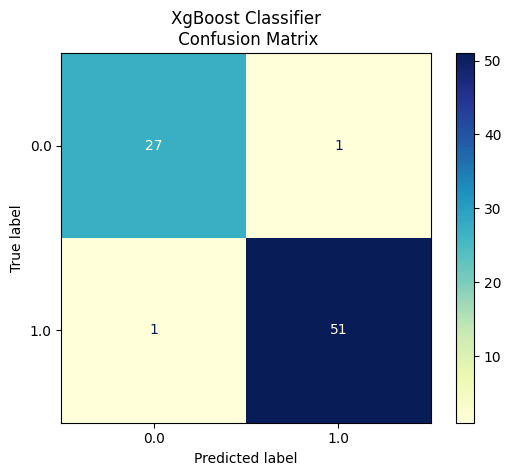

In [262]:

# Create Confusion Matrix from predictions

ConfusionMatrixDisplay.from_predictions(y_test2, xg1_preds, cmap= 'YlGnBu')

plt.title("XgBoost Classifier\n Confusion Matrix")
plt.show()

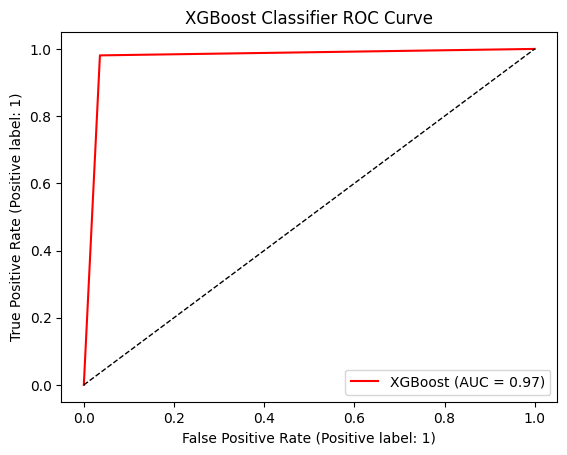

In [263]:
#Define parameters for ROC Curve plot
test = y_test2
preds = xg1_preds
Name = 'XGBoost'
Title = 'XGBoost Classifier ROC Curve'
roc_curve_plt(test, preds, Name,Title)

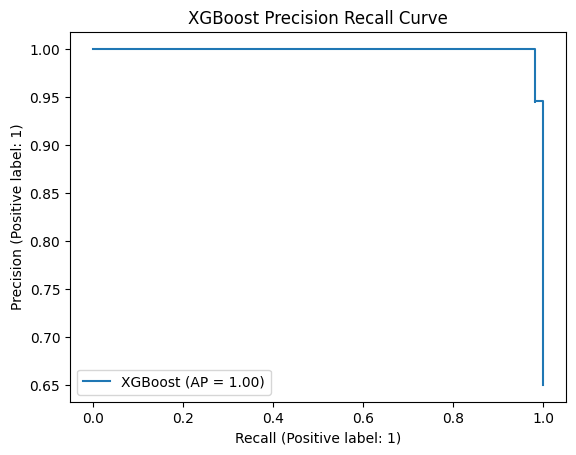

In [264]:
#Define parameters for prc
test = y_test2
pred_probs = pred_probs_xg1
Name = "XGBoost"
Title = "XGBoost Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

In [265]:
# Build Classification report
print(classification_report(y_test2, y_preds_ab))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        28
         1.0       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



# Check the models against Validation Set

In [236]:
#Check the models against the validation set
#Compute predictions

def preds_counts(model):
    val_preds = model.predict(val_scale_test) #val set obs
    
    #create prediction dataframe
    val_preds_df = pd.DataFrame(val_preds, columns=['class'])
    
    #actual class
    val_scale_class_df = pd.DataFrame(val_scale_class, columns=['actual_class'])
    
    #add the preds column to the actuals df
    val_scale_class_df['pred_class'] = val_preds_df['class']
    
    # Compare the columns and display count
    val_scale_class_df['diff']= (val_scale_class_df.apply(lambda x: x['actual_class'] if x['actual_class'] ==\
                                                     x['pred_class'] else 'False', axis =1))
    # Count the differences
    counts = val_scale_class_df.loc[val_scale_class_df['diff'] == 'False'].value_counts()
    return(counts, val_preds)

In [233]:
def roc_curve_plt(test, preds, Name,Title):
    lw = 1
    RocCurveDisplay.from_predictions(test, preds,
                                name = Name, 
                                color="red", pos_label=None)
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.title(Title)
    plt.show()
    return

In [234]:
# Compute average precision score
# Plot the precision recall curve

def prc_plt(test, pred_probs, Name, Title):
    PrecisionRecallDisplay.from_predictions(
         test, pred_probs, name = Name)
    plt.title(Title)
    plt.show()
    return

## RF with Validation Set

In [266]:
model = rf_model
counts, rf_preds2 = preds_counts(model)
counts


actual_class  pred_class  diff 
0.0           1.0         False    9
dtype: int64

In [268]:
# Compute predictions 

# compute predict probabilties on test set
# only need the probabilities for the positive class only 
pred_probs_rf2 = rf_model.predict_proba(val_scale_test)[:, 1]


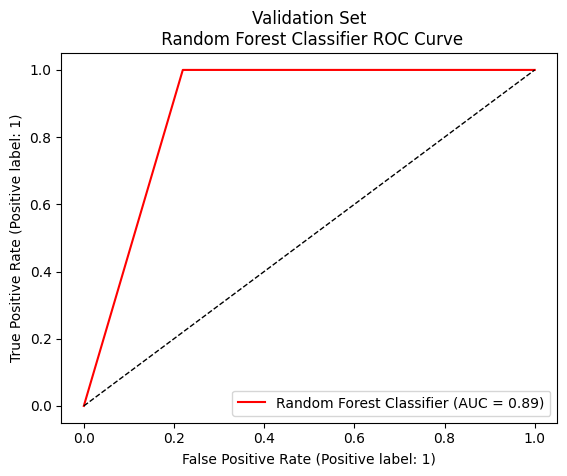

In [269]:
#Define parameters for ROC Curve plot
test = val_scale_class
preds = rf_preds2
Name = 'Random Forest Classifier'
Title = 'Validation Set\n Random Forest Classifier ROC Curve'
roc_curve_plt(test, preds, Name,Title)

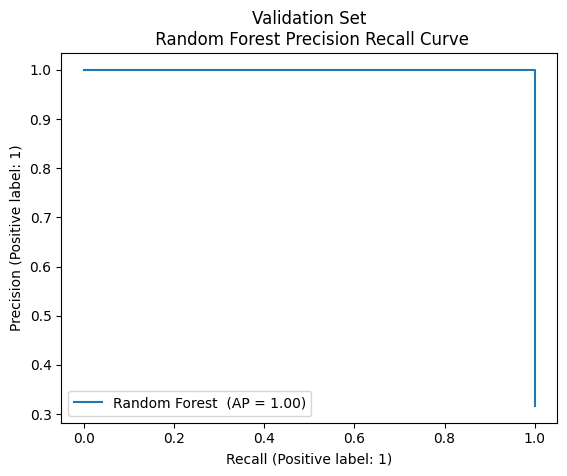

In [270]:
#Define parameters for prc
test = val_scale_class
pred_probs = pred_probs_rf2
Name = "Random Forest "
Title = "Validation Set\n Random Forest Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

## AdaBoost with Validation Set

In [237]:
model = gs_ab_model
counts, ab_preds2 = preds_counts(model)
counts


actual_class  pred_class  diff 
0.0           1.0         False    30
dtype: int64

In [239]:
# Compute predictions 

# compute predict probabilties on test set
# only need the probabilities for the positive class only 
pred_probs_ab2 = gs_ab_model.predict_proba(val_scale_test)[:, 1]


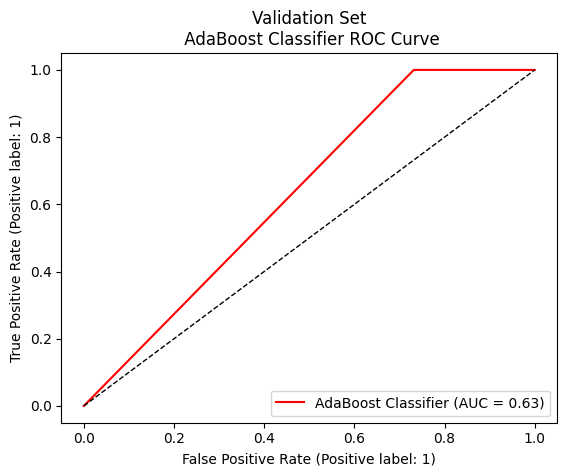

In [242]:
#Define parameters for ROC Curve plot
test = val_scale_class
preds = ab_preds2
Name = 'AdaBoost Classifier'
Title = 'Validation Set\n AdaBoost Classifier ROC Curve'
roc_curve_plt(test, preds, Name,Title)

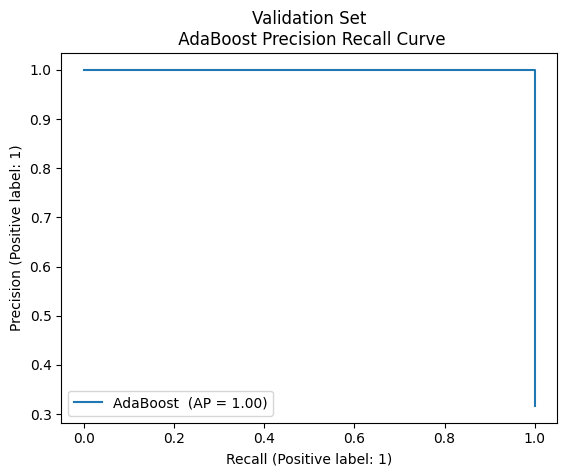

In [243]:
#Define parameters for prc
test = val_scale_class
pred_probs = pred_probs_ab2
Name = "AdaBoost "
Title = "Validation Set\n AdaBoost Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

## XgBoost with Validation Set

In [271]:
model = grid
counts, xg_preds2 = preds_counts(model)
counts

actual_class  pred_class  diff 
0.0           1           False    5
dtype: int64

In [272]:
# Compute predictions 

# compute predict probabilties on test set
# only need the probabilities for the positive class only 
pred_probs_xg2 = grid.predict_proba(val_scale_test)[:, 1]


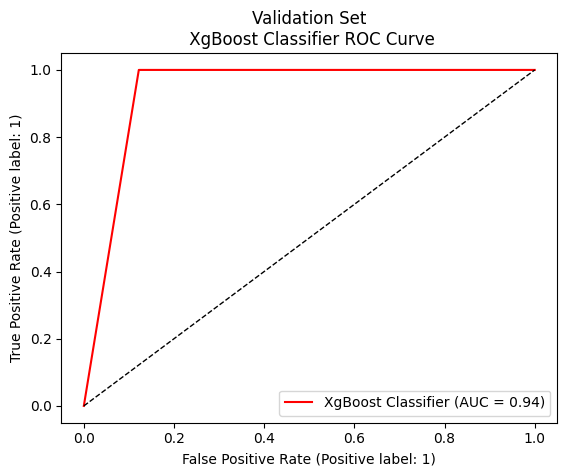

In [274]:
#Define parameters for ROC Curve plot
test = val_scale_class
preds = xg_preds2
Name = 'XgBoost Classifier'
Title = 'Validation Set\n XgBoost Classifier ROC Curve'
roc_curve_plt(test, preds, Name,Title)

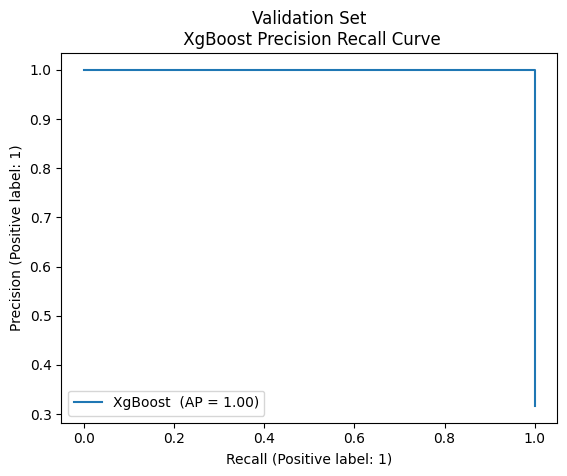

In [275]:
#Define parameters for prc
test = val_scale_class
pred_probs = pred_probs_xg2
Name = "XgBoost "
Title = "Validation Set\n XgBoost Precision Recall Curve"
prc_plt(test, pred_probs, Name, Title)

## Confusion Matrices and Accuracy Scores

In [276]:
# Create Confusion Matrix from predictions using validation set
#val_scale = scaler.fit_transform(val_set_test)
#val_class_scale = scaler.fit_transform(val_set_class)

def cm_model(Title, preds): 
    ConfusionMatrixDisplay.from_predictions(val_scale_class, preds, cmap= 'YlGnBu')

    plt.title(Title)
    plt.show()
    return

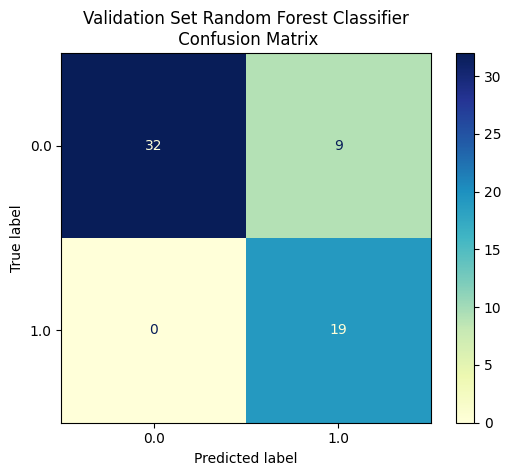

In [277]:
Title = 'Validation Set Random Forest Classifier\n Confusion Matrix'
preds = rf_preds2
cm_model(Title, preds)

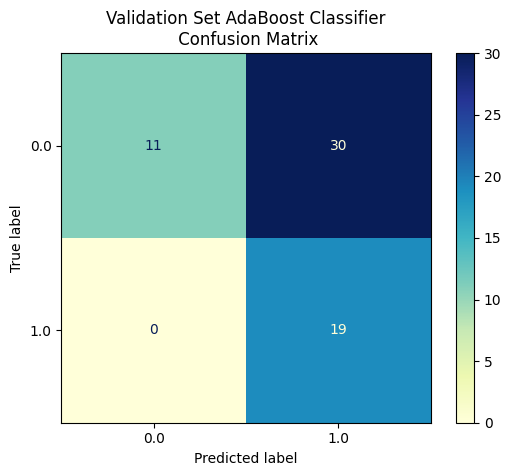

In [246]:
# deinately appears that AdaBoost suffers from overfitting

Title = 'Validation Set AdaBoost Classifier\n Confusion Matrix'
preds = ab_preds2
cm_model(Title, preds)

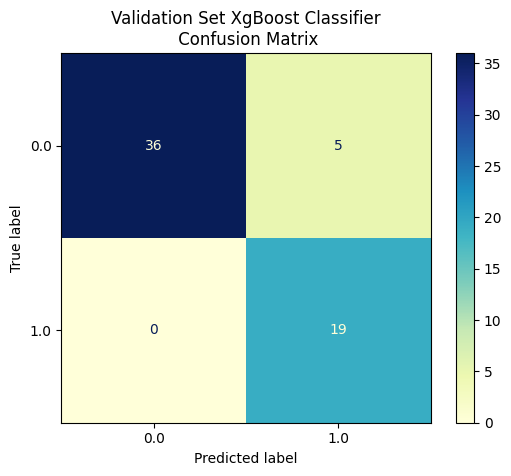

In [278]:
Title = 'Validation Set XgBoost Classifier\n Confusion Matrix'
preds = xg_preds2
cm_model(Title, preds)

In [248]:
# Accuracy scores
# View accuracy score
def acc_score(preds):
    score = accuracy_score(val_scale_class, preds)
    return(score)

In [279]:
preds = rf_preds2
accuracy = acc_score(preds)
accuracy

0.85

In [249]:
preds = ab_preds2
accuracy = acc_score(preds)
accuracy

0.5

In [280]:
preds = xg_preds2
accuracy = acc_score(preds)
accuracy

0.9166666666666666